# 1.2 Decision Trees

It can handle both numerical and categorical variables.

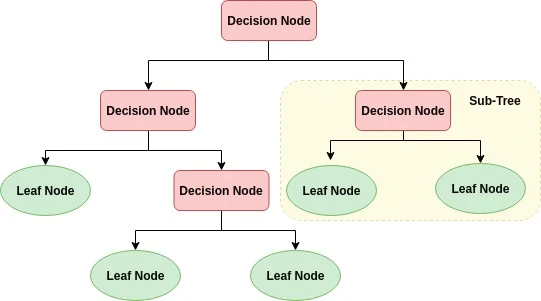

### Break down algorithm
1. 
(code 1) https://github.com/random-forests/tutorials/blob/master/decision_tree.ipynb

(explanation 1)https://www.youtube.com/watch?v=LDRbO9a6XPU&ab_channel=GoogleDevelopers

2. 
(explanation 2)https://www.youtube.com/watch?v=g9c66TUylZ4&ab_channel=StatQuestwithJoshStarmer



### Case Study- zoo animals

Dataset is from [Kaggle, zoo-animal](https://www.kaggle.com/uciml/zoo-animal-classification).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Machine Learning Dataset/zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df_class = pd.read_csv('Machine Learning Dataset/class.csv')
df_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


### EDA

C:\Users\xiaon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


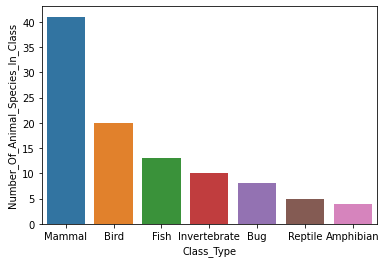

In [4]:
sns.barplot(df_class['Class_Type'],
            df_class['Number_Of_Animal_Species_In_Class'],
            order =df_class.sort_values('Number_Of_Animal_Species_In_Class',ascending = False).Class_Type ) #sort bars
plt.show()

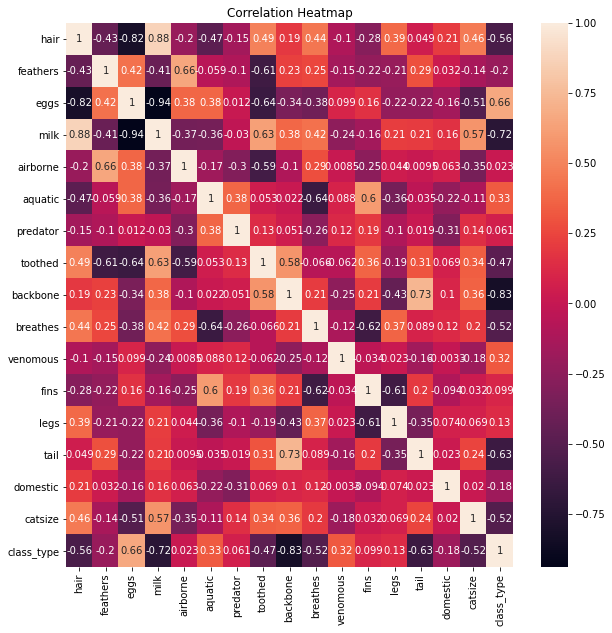

In [5]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [6]:
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,class_type
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845
tail,NaN,NaN,NaN,0.731762,NaN,NaN
class_type,NaN,NaN,-0.723683,-0.828845,NaN,NaN


In [7]:
features = list(df.columns)
print(features)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']


In [8]:
df.class_type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
features.remove('class_type')
features.remove('animal_name')
print(features)

['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']


In [11]:
X = df[features].values.astype(np.float32)
Y = df.class_type
print(X.shape)
print(Y.shape)

(101, 16)
(101,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50, 16)
(50,)
(51, 16)
(51,)


In [13]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("training accuracy :", model.score(X_train, Y_train))
print("testing accuracy :", model.score(X_test, Y_test))

training accuracy : 1.0
testing accuracy : 0.9019607843137255


In [14]:
X_test[0:1]

array([[1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 0., 0.]],
      dtype=float32)

In [15]:
model.predict(X_test[0:1])

array([1], dtype=int64)